# Максимально правдоподобная домашка

В этом задании мы с вами отточим метод максимального правдоподобия.

In [ ]:
import numpy as np
import pandas as pd

from scipy import stats
from scipy.optimize import minimize

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

## Упражнение 1 (Разминка)

__а)__ Пусть $X \sim Exp(0.05)$. Сгенерируйте из этого распределения выборку размера $1000$. У метода `rvs` используйте `random_state=42` 

Обратите внимание, что `stats.expon` принимает в качестве параметра `scale` значение $\frac{1}{\lambda}$, а $0.05$ это именно $\lambda$.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

lambda_ = 0.05
x = stats.expon(scale=1/lambda_).rvs(size=1000, random_state=42)

In [ ]:
assert np.abs(19.45 - np.mean(x)) < 0.01

__б)__ Выпишите логарифмическую функцию правдоподобия на бумажке. Затем вбейте её в python.

In [ ]:
def lnL(theta, x):
    l = np.sum(np.log(theta) - (theta * x))
    return -l

In [ ]:
assert np.abs(lnL(4, x) - 76414.1814) < 1e-4

__в)__ Оцените значение параметра $\lambda$ по сгенерированной выборке `x`.
Аккуратнее выбирайте точку для инициализации параметра. 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

theta_init = 0.05
res = minimize(lnL, theta_init, args=x)

In [ ]:
assert np.abs(res.x[0] - 0.0514) < 1e-4

__г)__ Постройте график для функции правдоподобия.
По оси $x$ отложите значения $\lambda$, по оси $y$ логарифм правдоподобия.
Отметьте на картинке точку оптимума. 

Text(0, 0.5, 'Логарифм правдоподобия')


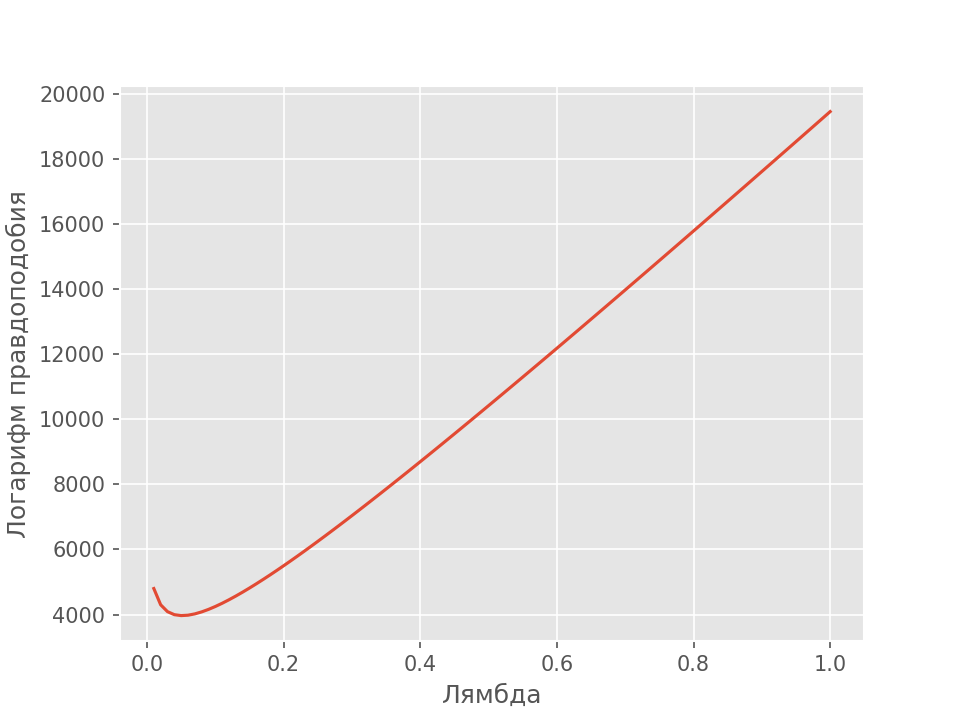

In [1]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

x_ = np.linspace(0.01, 1, num=100)
y_ = np.array([lnL(xi, x) for xi in x_])

plt.plot(x_, y_)
plt.xlabel('Лямбда')
plt.ylabel('Логарифм правдоподобия')

# your code here

__д)__ Постройте для параметра $\lambda$ асимптотический $80\%$ доверительный интервал. 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

alpha = 0.2
z = stats.norm.ppf(1 - alpha / 2)

left = res.x[0] - z * np.sqrt(res.hess_inv[0, 0])
right = res.x[0] + z * np.sqrt(res.hess_inv[0, 0])

# your code here

In [ ]:
assert np.abs(z - 1.2815) < 1e-4

__е)__ Проверите на уровне значимости $1\%$ тестом отношения правдоподобия гипотезу о том, что $\lambda = 0.05$. 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

alpha = 0.01

lnL_un = res.fun
lnL_r = lnL(0.05, x)

# наблюдаемое значение статистики
LR_obs = 2 * (lnL_r - lnL_un)

# критическое значение
LR_cr = stats.chi2(df=1).ppf(1 - alpha)

# your code here

In [ ]:
assert np.abs(lnL_un - 3967.8531) < 1e-4

Справились? Значит вас ничто не может остановить реализовать подобный пайплайн для более сложной ситуации.
Убедитесь в этом сами, решив задачку про «Челленджер».

## Упражнение 2 (Логистическая регрессия)

В этом упражнении мы оценим методом максимального правдоподобия логистическую регрессию.

$28$ января $1986$ года космический шатл «Челленджер» взорвался при взлёте.
Семь астронавтов, находившихся на борту, погибли.
В ходе расследования причин катастрофы основной версией была неполадка с
резиновыми уплотнительными кольцами всоединении с ракетными ускорителями.
Для $23$ предшествовавших катастрофе полётов «Челленджера» известны температура воздуха
и появление повреждений хотя бы у одного из уплотнительных колец.

In [ ]:
!wget 'https://drive.google.com/u/0/uc?id=1i8uFqV1LPj6ur-HSlL7BEsrHfG4XnNkU' -O "challenger.csv"

In [2]:
df = pd.read_csv('challenger.csv', sep=',')
print(df.shape)
df.head()

(23, 3)


         Date  Temperature  Incident
0  04/12/1981           66         0
1  11/12/1981           70         1
2     3/22/82           69         0
3  01/11/1982           68         0
4  04/04/1983           67         0

__а)__ Постройте на графиках гистограмму для распределения температуры $(Temperature)$ в ситуациях,
когда хотябы одно кольцо было повреждено $(Incident = 1)$ и в ситуациях,
когда ни одного повреждения не было $(Incident = 0)$. 

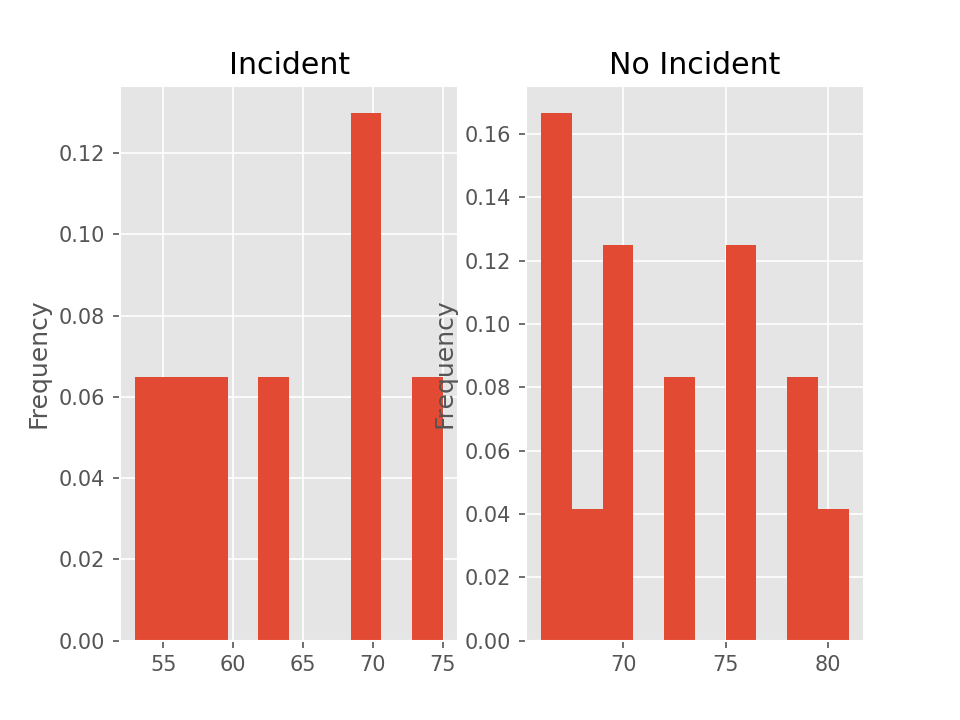

<AxesSubplot: title={'center': 'No Incident'}, ylabel='Frequency'>

In [3]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

fig, axis = plt.subplots(1, 2)

incident = df[df['Incident'] == 1]
no_incident = df[df['Incident'] == 0]

incident['Temperature'].plot(kind='hist', title='Incident', ax=axis[0], density=True)
no_incident['Temperature'].plot(kind='hist', title='No Incident', ax=axis[1], density=True)

In [4]:
df[df['Incident'] == 1].Temperature.mean(), df[df['Incident'] == 0].Temperature.mean()

(63.714285714285715, 72.125)

__б)__ Судя по всему, между температурой и вероятностью поломки есть взаимосвязь.
Пусть вероятность поломки зависит от температуры экспоненциально:
    
$$
P(Incident = 1) = \frac{e^{\alpha + \beta \cdot t}}{1 + e^{\alpha + \beta \cdot t}} = \frac{1}{1 + e^{-1\cdot(\alpha + \beta \cdot t)}} 
$$
    
Выведите функцию правдоподобия и задачу для оптимизации поиска коэффициентов $\alpha$ и  $\beta$ на бумажке,
а затем вбейте её в python. 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

def lnL(theta, data):
    a, b = theta
    
    p = np.array(1/(1 + np.exp(-a - (b * data['Temperature']))))
    likelihood = np.prod(p, where=(data['Incident'] == 1))
    likelihood *= np.prod((1 - p), where=(data['Incident'] == 0))
    l = np.log(likelihood)

    return -l

In [ ]:
assert np.abs(lnL([4, 0.2], df) - 294.8) < 1e-4

__в)__ Оцените параметры $\alpha$ и $\beta$ с помощью метода максимального правдоподобия.

In [5]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

theta_init = (0, 0)
res = minimize(lnL, theta_init, df)

# your code here

10.157596343991427


In [ ]:
assert np.abs(res.fun - 10.1576) < 1e-4

__г)__ С помощью теста отношения правдоподобий на уровне значимости $5\%$ проверьте гипотезу о том, что $\alpha = \beta = 0$.

In [6]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

lnL_un = res.fun
lnL_r = lnL((0, 0), df)

LR_obs = 2 * (lnL_r - lnL_un)
LR_crit = stats.chi2(df=0).ppf(1 - 0.05)

# your code here

15.942385152878742

In [ ]:
assert np.abs(lnL_un - 10.1576) < 1e-4

__д)__ В день катастрофы температура уплотнителя была $31$ градус по Фарингейту.
Предскажите с помощью построенной модели вероятность катастрофы
(для этого подставьте в формулу поиска вероятности получившиеся оценки и температуру).

In [7]:
xnew = 31
alpha, beta = res.x

### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

p_hat = 1/(1 + np.exp(-alpha - beta * xnew))

# your code here

15.042980839541388 -0.2321639100734836


In [ ]:
assert np.abs(p_hat - 0.9996) < 1e-4

Только что мы с вами оценили логистическую регрессию.
На самом деле функцию потерь, которую обычно используют для оценки логистической
регрессии (logloss) можно получить из метода максимального правдоподобия.
Об этом мы поговорим на следующей неделе нашего курса. 

__е)__ А сейчас, давайте сделаем финальный штрих и оценим ту же самую моделю с помощью пакета `statsmodels`.

In [8]:
import statsmodels.formula.api as smf

model = smf.logit(data=df, formula='Incident ~ 1 + Temperature').fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.441635
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
Dep. Variable:               Incident   No. Observations:                   23
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            1
Date:                Wed, 28 Dec 2022   Pseudo R-squ.:                  0.2813
Time:                        04:10:45   Log-Likelihood:                -10.158
converged:                       True   LL-Null:                       -14.134
Covariance Type:            nonrobust   LLR p-value:                  0.004804
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      15.0429      7.379      2.039      0.041       0.581      29.505
Temperature    -0.2322      0.108     -2.145      0.032      -0.444      -0.020


Посмотрев на протокол, получившийся в результате оценивания модели ответьте на вопросы: 

- Чему равно значение логарифма правдоподобия? Запишите это значение в `logLik`
- Чему равна оценка константы $\alpha$? Запишите это значение в `alph`
- По свойствам метода максимального правдоподобия $\hat{\beta} \sim N(\beta, \hat{\sigma}^2_{\beta})$, 
  чему равно значение $\hat{\sigma}_{\beta}$? Запишите это значение в `std_beta`
- Чему равно p-значение для гипотезы $H_0: \beta = 0$? Запишите это значение в `pval_beta`
- Отвергается ли гипотеза $H_0: \beta = 0$ на $5\%$ уровне значимости? Если да, запишите в `is_h` значение `False`

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

logLik = -10.158
alph = 15.0429
std_beta = 0.108
pval_beta = 0.032
is_h = False

# your code here

In [ ]:
assert np.abs(logLik + 10.158) < 1e-4